In [211]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Jupyter magic for inline figures
%matplotlib inline 

mpl.rcParams['image.cmap'] = 'Accent'

In [212]:
N = 50
X = np.hstack((np.ones((N, 1)), np.random.randn(N, 1)))
Y = 3.9 * X[:, 0] + 2.5 * X[:, 1] + 0.7 * np.random.randn(N)

In [213]:
def plot_samples(X, Y):
    plt.scatter(X[:, 1], Y)

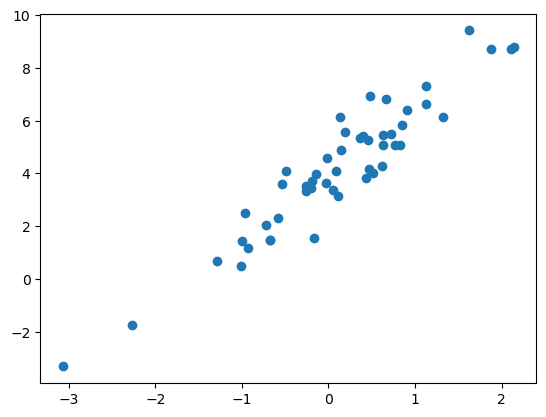

In [214]:
plot_samples(X, Y)

### Least square for linear regression
We try to minimize $L(\theta)$.
$$
L(\theta)=\frac{1}{N}(y-X\theta)^T(y-X\theta)
$$
With $\frac{dL(\theta)}{d\theta}=0$, we get the following.
$$
\theta = (X^TX)^{-1}X^Ty \\
$$

The hat matrix $H$'s trace is the number of parameters.
$$
H = X(X^TX)^{-1}X^T
$$

Loss:  0.6738724141487918
Trace of H matrix:  2.0


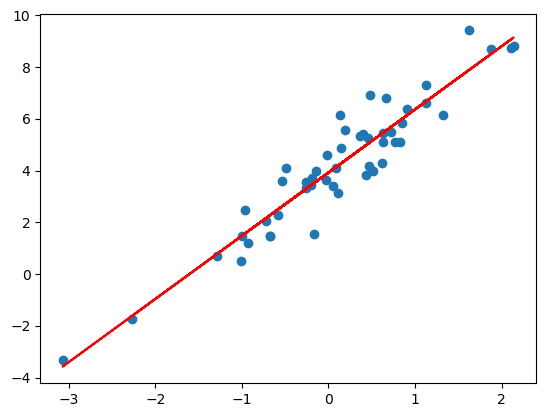

In [215]:
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
Y_hat = X @ theta

plot_samples(X, Y)
plt.plot(X[:, 1], Y_hat, c='red')

# loss
loss = (Y - X @ theta) @ (Y - X @ theta).T / N
print('Loss: ', loss)

# check H matrix
H = X @ np.linalg.inv(X.T @ X) @ X.T
print('Trace of H matrix: ', np.trace(H))

None

### Linear regression with feature
We try to approximate the following polynomial
$$
y = 2.5x^3 - 1.2x^2 + 0.5x + 0.7
$$

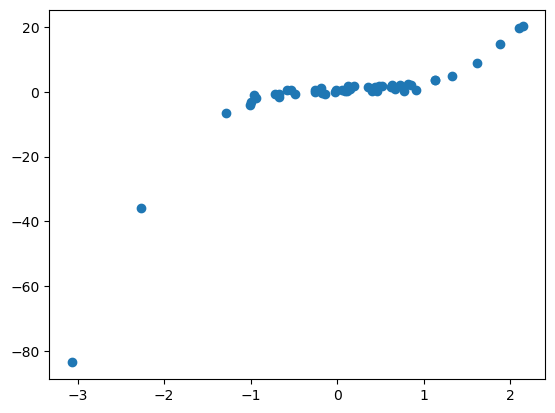

In [216]:
Y = 0.7 * X[:, 0] + 0.5 * X[:, 1] - 1.2 * X[:, 1] ** 2 + 2.5 * X[:, 1] ** 3 + 0.7 * np.random.randn(N)

plot_samples(X, Y)
None

We use $\Phi$ matrix to replace $X$ as the input.
$$
\Phi = \begin{bmatrix}X_0 & X_1 & X_1^2 & X_1^3\end{bmatrix}
$$
Then, we get the $\theta$.
$$
\theta = (\Phi^T\Phi)^{-1}\Phi^Ty
$$

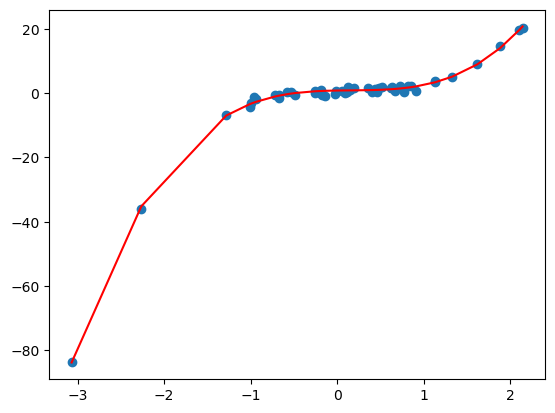

In [217]:
Phi = np.hstack((X[:, [0]], X[:, [1]], X[:, [1]] ** 2, X[:, [1]] ** 3))

theta = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y
Y_hat = Phi @ theta

order = np.argsort(X[:, 1])
plot_samples(X, Y)
plt.plot(X[order, 1], Y_hat[order], c='red')

None

### Regularized least square
The new loos function is the following.
$$
L(\theta) = \frac{1}{N}(y-X\theta)^T(y-X\theta)+\lambda\lVert\theta\rVert _p ^2
$$
Then, we get the $\theta$.
$$
\theta = (X^TX+N\lambda I)^{-1}X^Ty
$$

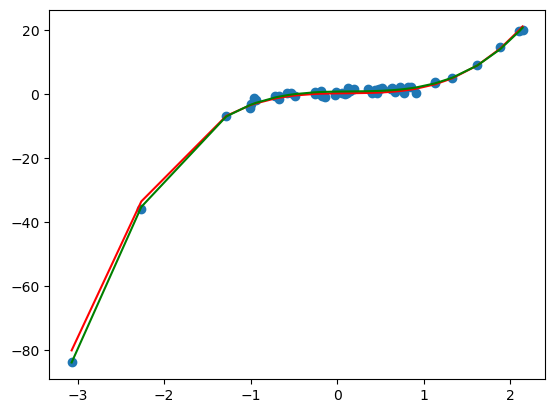

In [218]:
p = 2 # norm
lam = 1.0 # lambda

theta_reg = np.linalg.inv(Phi.T @ Phi + N * lam * np.identity(Phi.shape[1])) @ Phi.T @ Y
Y_hat_reg = Phi @ theta_reg

plot_samples(Phi, Y)
plt.plot(X[order, 1], Y_hat_reg[order], c = 'red')
plt.plot(X[order, 1], Y_hat[order], c = 'green')

None

### Optimization using gradient descent
$X^TX$ may not always have the inverse, we could use gradient descent for finding the optimized model. The gradient of $L$ w.r.t. $\theta$ is the following.
$$
L(\theta) = -\frac{2}{N}(y-X\theta)^TX
$$

In [219]:
def loss(theta, X, Y):
    return (Y - X @ theta).T @ (Y - X @ theta) / N

def gradient(theta, X, Y):
    return -(2.0 / N) * (Y - X @ theta).T @ X

def train(X, Y, steps = 100):
    lr = 0.01
    theta = np.zeros(X.shape[1])

    for i in range(steps):
        theta -= lr * gradient(theta, X, Y)
        if i % 10 == 0:
            print('Loss: ', loss(theta, X, Y))
    
    return theta

def train_heuristic(X, Y, steps=100):
    theta = np.zeros(X.shape[1])

    for i in range(steps):
        lr = 1.0 / (i + 1.0)
        theta -= lr * gradient(theta, X, Y)
        if i % 10 == 0:
            print('Loss: ', loss(theta, X, Y))
    
    return theta

def train_momentum(X, Y, steps=500):
    theta = np.zeros(X.shape[1])
    alpha = 0.3
    m = 0.0

    for i in range(steps):
        lr = 1.0 / (i + 1.0)
        m = (1 - alpha) * m + alpha * gradient(theta, X, Y)
        lr = 1.0 / (i + 1.0)

        theta -= lr * m
        if i % 10 == 0:
            print('Loss: ', loss(theta, X, Y))
    
    return theta


In [220]:
steps = 70

print('Gradient descent')
theta_1 = train(Phi, Y, steps=steps)

print('\nGradient descent with heuristic')
theta_2 = train_heuristic(Phi, Y, steps=steps)

print('\nGradient descent with momentum')
theta_3 = train_momentum(Phi, Y, steps=steps)

Y_hat_1 = Phi @ theta_1
Y_hat_2 = Phi @ theta_2
Y_hat_3 = Phi @ theta_3

Gradient descent
Loss:  44.937475738650484
Loss:  1.1019351490486406
Loss:  0.9203996034970637
Loss:  0.8158117234938461
Loss:  0.7433345301428358
Loss:  0.68926006753872
Loss:  0.6479008217903893
Loss:  0.6160127715980288
Loss:  0.5913599981065409
Loss:  0.5722790213336217

Gradient descent with heuristic
Loss:  494464.60586002516
Loss:  4.530322952810282e+23
Loss:  2.787977040274484e+30
Loss:  1.3982934847574417e+30
Loss:  4.409356143961183e+22
Loss:  511.7992884659629
Loss:  0.5103302108749839
Loss:  0.509513447329915
Loss:  0.5089265149074071
Loss:  0.508484745147382

Gradient descent with momentum
Loss:  40531.40199171403
Loss:  2752340.2007089304
Loss:  163857.04677939723
Loss:  196.33988060488832
Loss:  73.64692473669675
Loss:  2.0348740448388303
Loss:  0.5062234086768324
Loss:  0.5071574787050888
Loss:  0.5056124343777355
Loss:  0.505597533972785


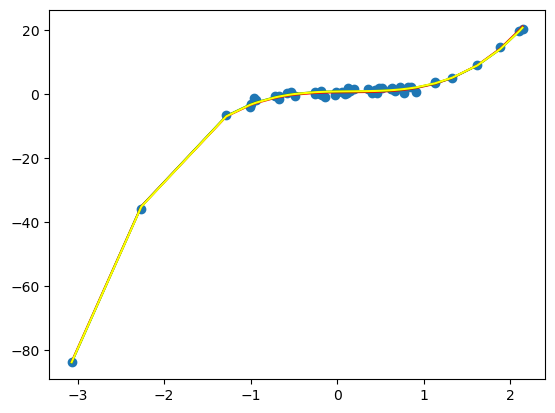

In [221]:
plot_samples(X, Y)
plt.plot(X[order, 1], Y_hat_1[order], c = 'red')
plt.plot(X[order, 1], Y_hat_2[order], c = 'green')
plt.plot(X[order, 1], Y_hat_3[order], c = 'yellow')
None 